In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [2]:
import pickle

In [3]:
with open('df_unsw_train50_with_preprocessing_labelencoder_minmax', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [4]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (889011, 41)
X teste =  (381005, 41)
y multiclasse treino =  (889011,)
y multiclasse teste =  (381005,)
y binário treino =  (889011,)
y binário teste =  (381005,)


In [5]:
#X_train50_train.head()
X_train50_train

array([[0.5347606 , 0.48215198, 0.85074627, ..., 0.07575758, 0.07575758,
        0.07575758],
       [0.12192139, 0.75029785, 0.85074627, ..., 0.03030303, 0.12121212,
        0.03030303],
       [0.18585427, 0.40059416, 0.85074627, ..., 0.03030303, 0.03030303,
        0.12121212],
       ...,
       [0.15698385, 0.12545452, 0.85074627, ..., 0.10606061, 0.16666667,
        0.16666667],
       [0.63209957, 0.37606957, 0.85074627, ..., 0.        , 0.        ,
        0.01515152],
       [0.48259261, 0.7325504 , 0.89552239, ..., 0.04545455, 0.04545455,
        0.01515152]])

In [6]:
#print(y_train50_multiclass_train.unique())
#print(y_train50_binary_train.unique())
print(y_train50_multiclass_train)
print(y_train50_binary_train)

1126124    Benign
1202977    Benign
39741      Benign
156053     Benign
1230603    Benign
            ...  
110268     Benign
259178     Benign
131932     Benign
671155     Benign
121958     Benign
Name: Label_multiclass, Length: 889011, dtype: object
1126124    0
1202977    0
39741      0
156053     0
1230603    0
          ..
110268     0
259178     0
131932     0
671155     0
121958     0
Name: Label_binary, Length: 889011, dtype: int64


In [7]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [8]:
#X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
#X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [9]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [10]:
with open('df_unsw_test50_with_preprocessing_labelencoder_minmax', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [11]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1270018, 41)
y multiclasse =  (1270018,)
y binário =  (1270018,)


In [12]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [13]:
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [14]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [15]:
#y_test50_binary.value_counts()
y_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [16]:
#y_test50_multiclass.value_counts()
y_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [17]:
#X_test50.head()
X_test50

array([[0.37028437, 0.36629067, 0.85074627, ..., 0.07575758, 0.07575758,
        0.07575758],
       [0.05414945, 0.71379721, 0.85074627, ..., 0.04545455, 0.04545455,
        0.        ],
       [0.63784269, 0.7325504 , 0.89552239, ..., 0.16666667, 0.16666667,
        0.16666667],
       ...,
       [0.00701249, 0.7325504 , 0.89552239, ..., 0.45454545, 0.45454545,
        0.39393939],
       [0.01221381, 0.55468907, 0.85074627, ..., 0.06060606, 0.07575758,
        0.        ],
       [0.20362544, 0.79492178, 0.85074627, ..., 0.01515152, 0.01515152,
        0.01515152]])

In [18]:
#print(y_test50_multiclass.unique())
#print(y_test50_binary.unique())
print(y_test50_multiclass)
print(y_test50_binary)

['Benign' 'Benign' 'Generic' ... 'Benign' 'Benign' 'Benign']
[0 0 1 ... 0 0 0]


In [19]:
#X_test50.shape

In [20]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

# Algoritmo XGBoost para Train e Validation - Train50

In [21]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [22]:
import xgboost as xgb
#from pandas import MultiIndex, Int64Index

/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Predição train50 binária

In [23]:
xgb_train50_binary = xgb.XGBClassifier(objective="binary:logistic", n_estimators=100, max_depth=8, random_state=42)

In [24]:
xgb_train50_binary.fit(X_train50_train, y_train50_binary_train)

/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:06:40] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
predict_train50_binary = xgb_train50_binary.predict(X_train50_test)

In [26]:
predict_train50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
y_train50_binary_test

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.9994488261308907

### Visualização da árvore binária

In [29]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [30]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [31]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

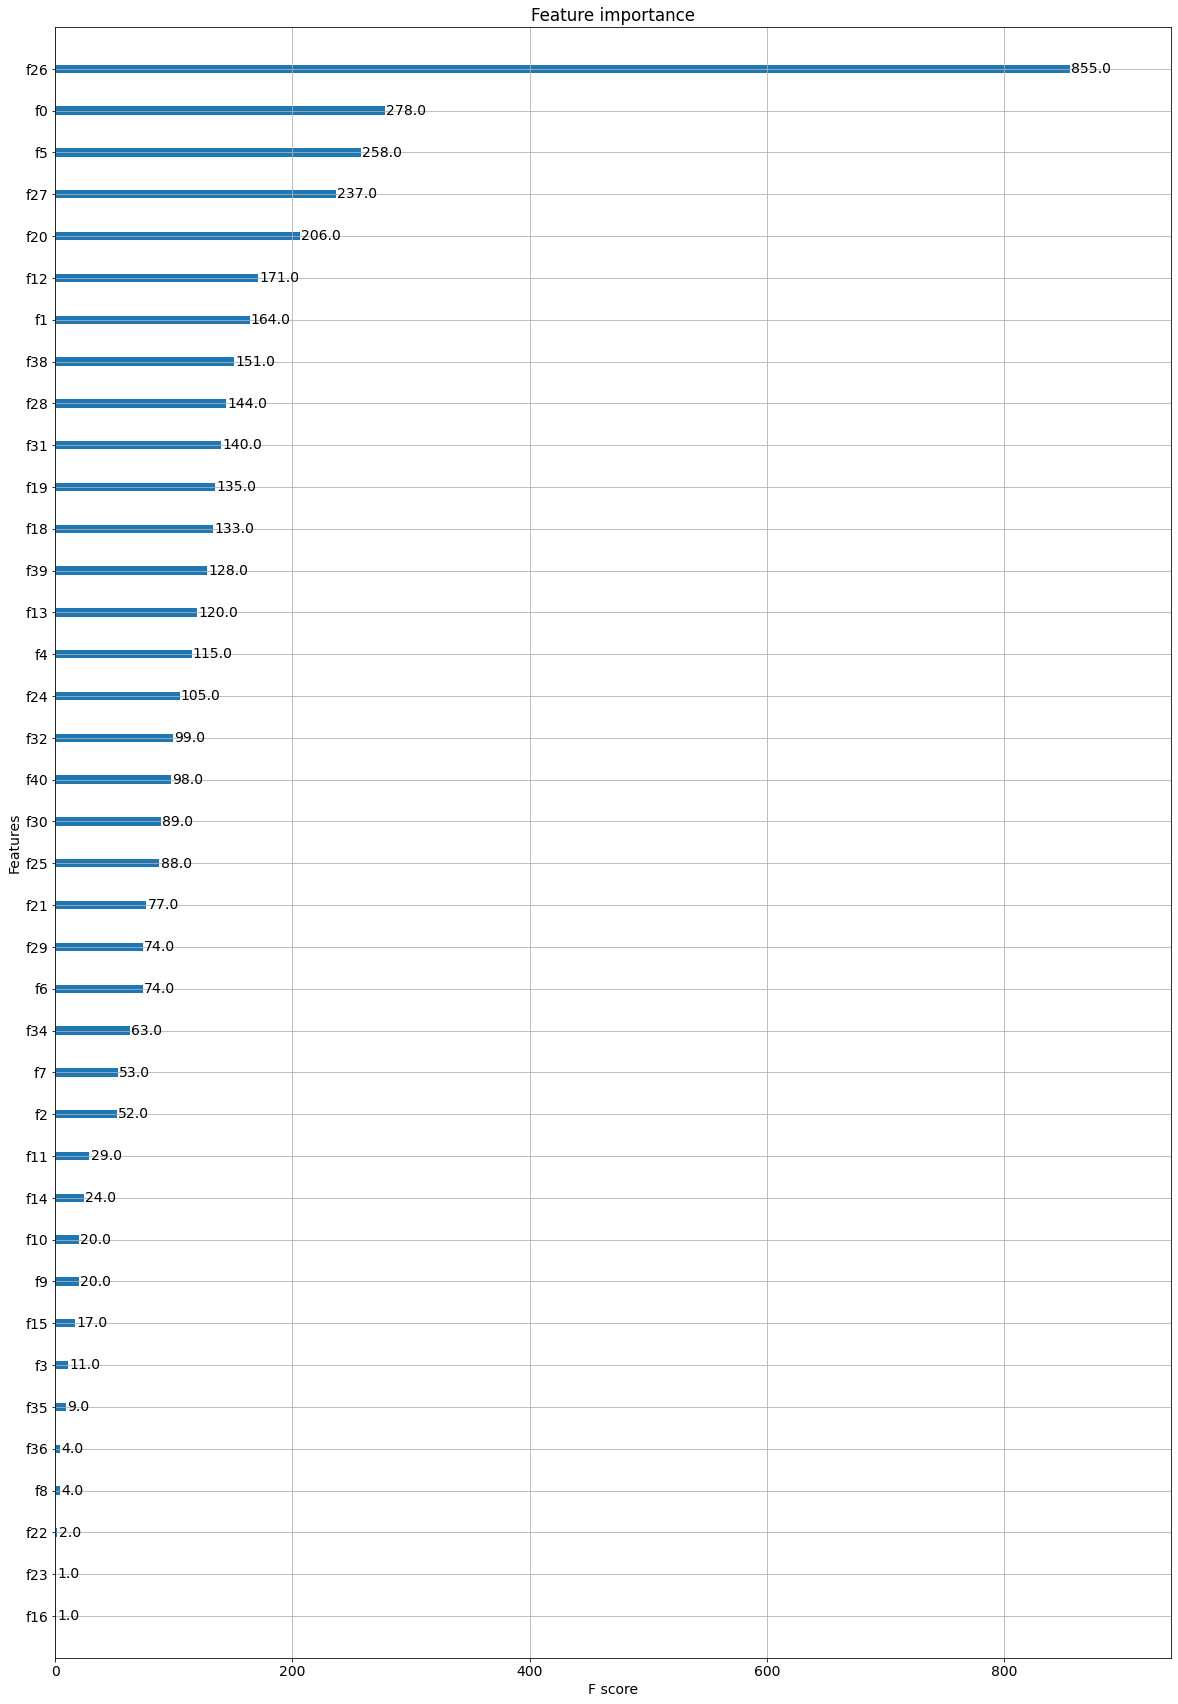

In [32]:
fig, ax = plt.subplots(figsize=(20,30))
xgb.plot_importance(xgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [33]:
xgb_train50_multiclass = xgb.XGBClassifier(n_estimators=100, max_depth=8, random_state=42)
xgb_train50_multiclass.objective

'binary:logistic'

In [34]:
xgb_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:11:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=8, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [35]:
predict_train50_multiclass = xgb_train50_multiclass.predict(X_train50_test)

In [36]:
predict_train50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [37]:
y_train50_multiclass_test

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [38]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9876852009816144

### Visualização da árvore multiclasse

In [39]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [40]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

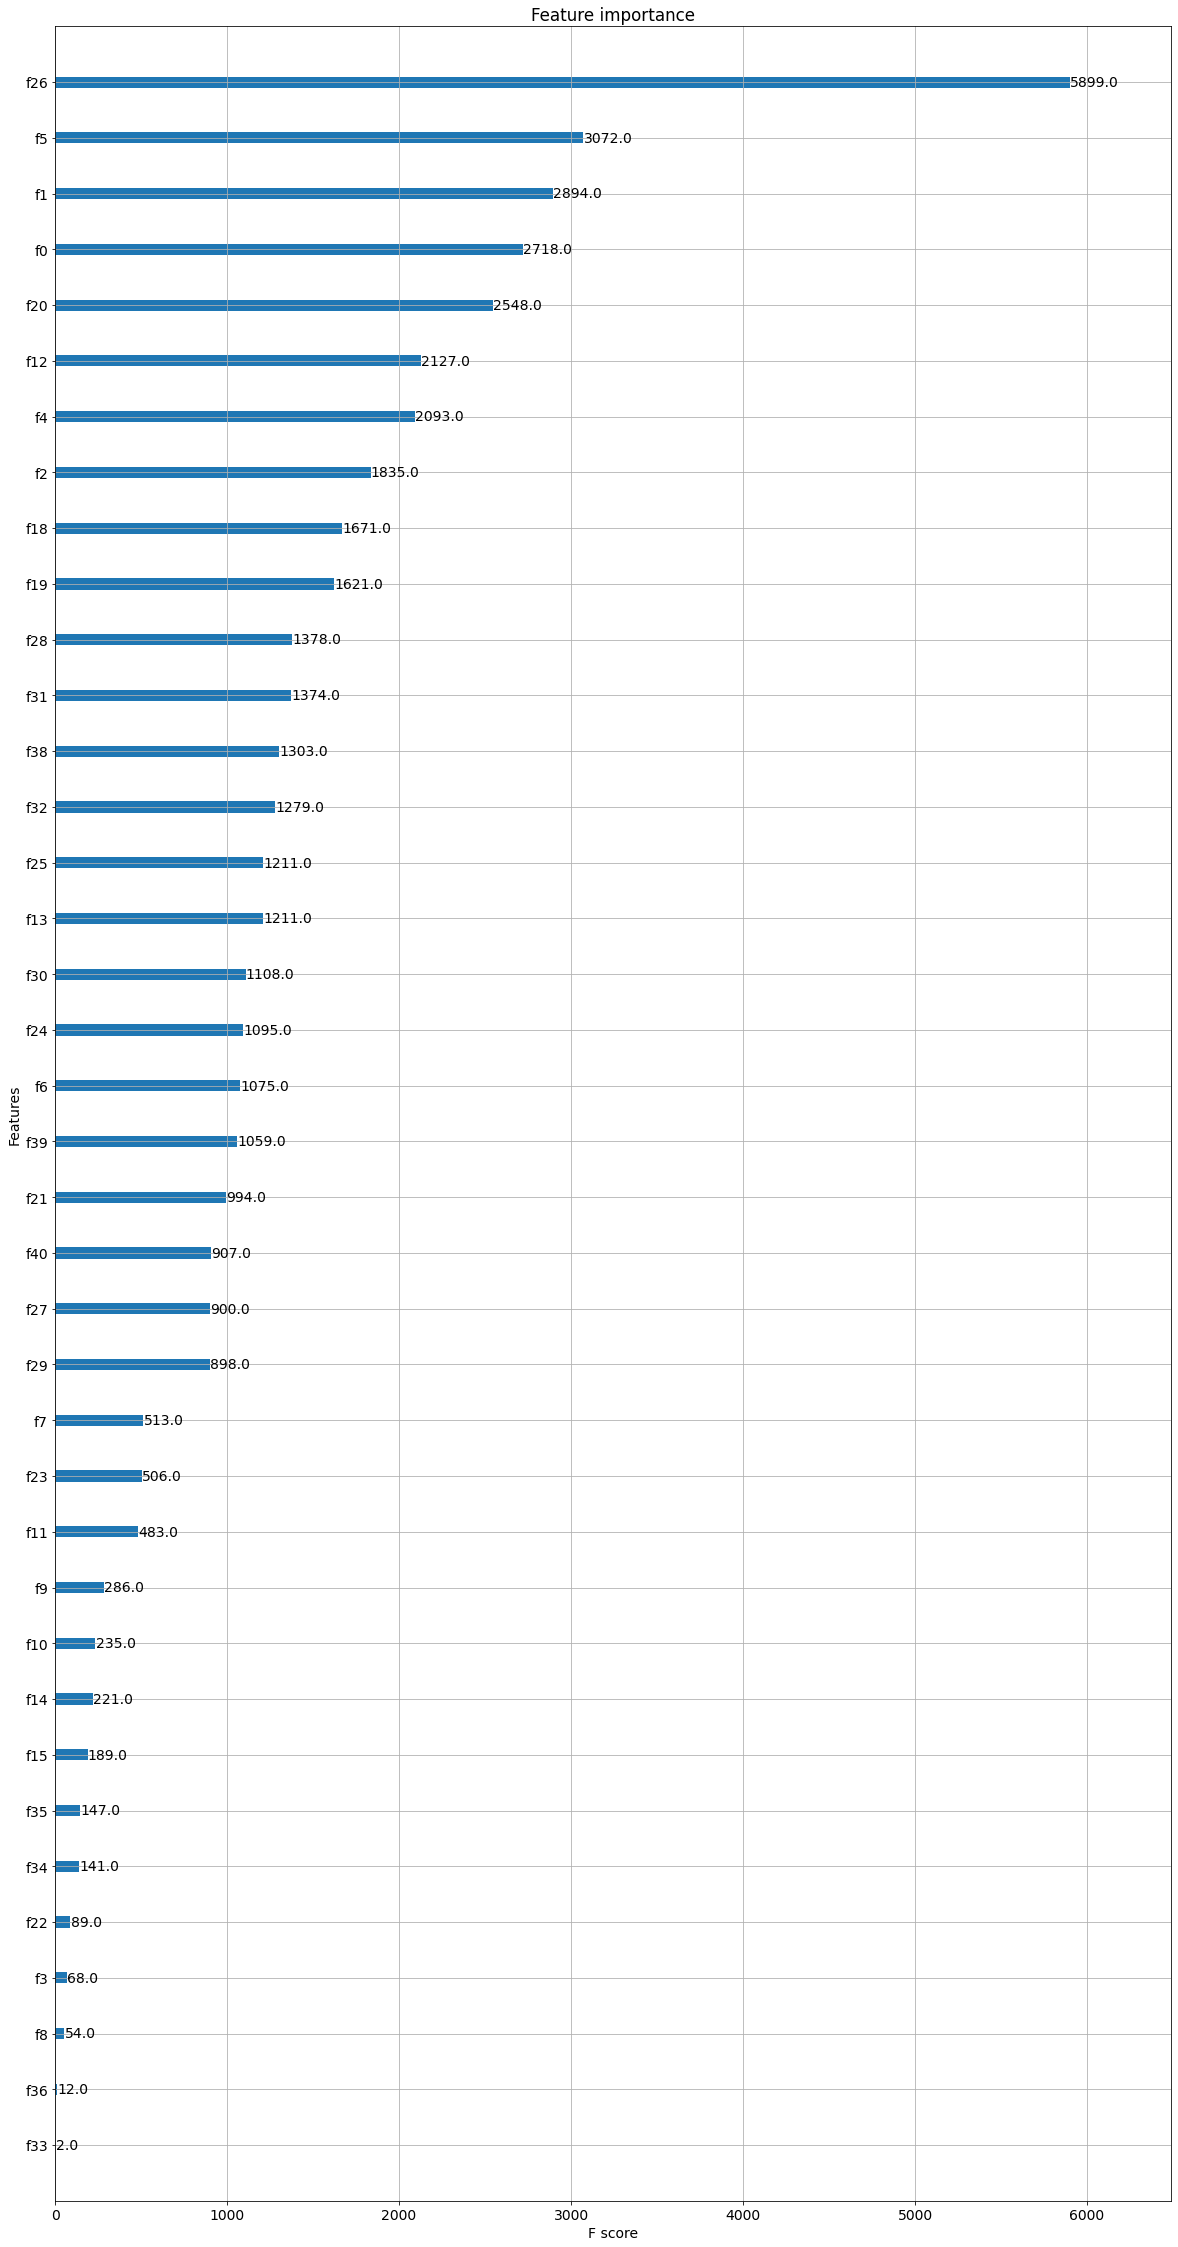

In [41]:
fig, ax = plt.subplots(figsize=(20,40))
xgb.plot_importance(xgb_train50_multiclass, ax=ax)

### Precision e Recall do train50

In [42]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999760  0.999609  0.999684    332738
           1   0.997309  0.998343  0.997826     48267

    accuracy                       0.999449    381005
   macro avg   0.998534  0.998976  0.998755    381005
weighted avg   0.999449  0.999449  0.999449    381005



In [43]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.730769  0.142500  0.238494       400
      Backdoor   0.793103  0.073248  0.134111       314
        Benign   0.999669  0.999642  0.999656    332738
           DoS   0.469104  0.368826  0.412965      2470
      Exploits   0.686044  0.843972  0.756857      6768
       Fuzzers   0.836551  0.886283  0.860699      3667
       Generic   0.997561  0.986944  0.992224     32322
Reconnaissance   0.924486  0.798178  0.856702      2086
     Shellcode   0.745536  0.766055  0.755656       218
         Worms   0.692308  0.409091  0.514286        22

      accuracy                       0.987685    381005
     macro avg   0.787513  0.627474  0.652165    381005
  weighted avg   0.987883  0.987685  0.987109    381005



### Cross Validation do train50

In [44]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(xgb_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:49:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:52:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:54:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:57:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:59:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:01:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:03:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:06:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:08:23] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:10:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [45]:
score_cv_train50_binary

array([0.99931385, 0.99941508, 0.99937009, 0.99935884, 0.99959506,
       0.99933634, 0.99956131, 0.99949382, 0.99942633, 0.99946007])

In [46]:
cv_result_train50_binary

[0.9994330780150378]

In [47]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(xgb_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:36:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:58:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:19:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:43] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:45:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:07:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/jupyter/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [48]:
score_cv_train50_multiclass

array([0.98744685, 0.98750295, 0.98726673, 0.98791915, 0.98722174,
       0.9875142 , 0.98731173, 0.98800913, 0.98725549, 0.98727798])

In [49]:
cv_result_train50_multiclass

[0.9874725959810895]

### Matriz de Confusão do train50

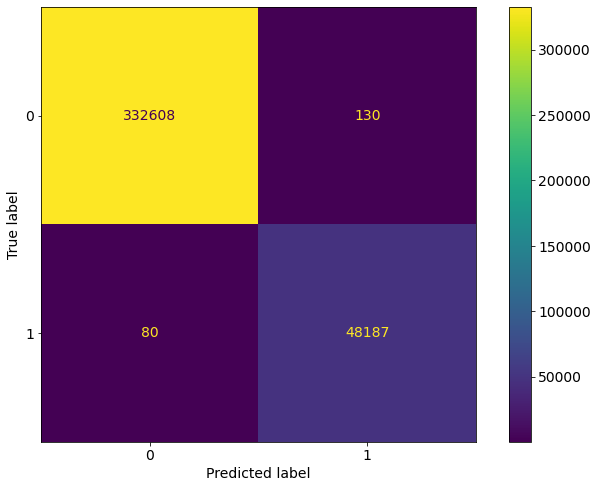

In [50]:
ConfusionMatrixDisplay.from_estimator(xgb_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

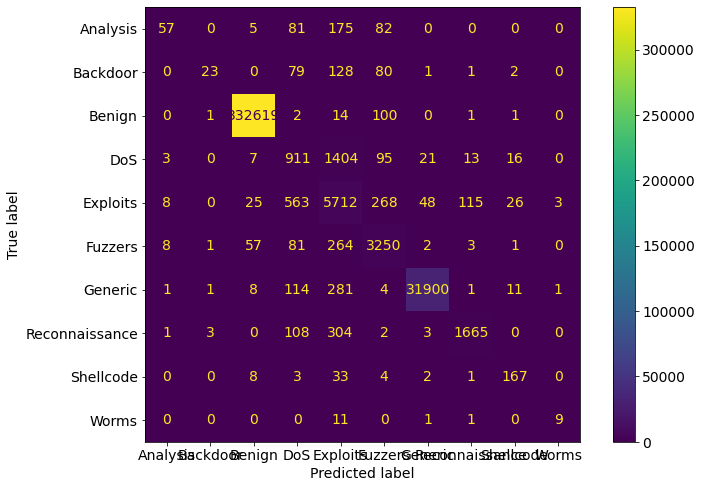

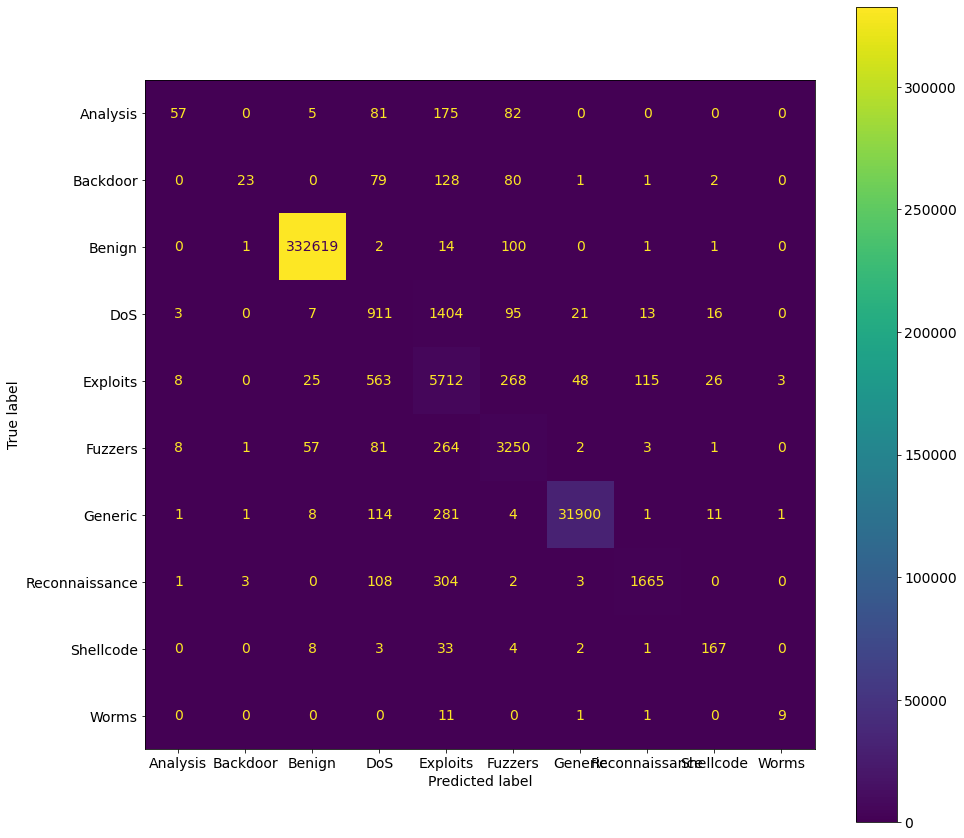

In [51]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_xgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_xgb_multiclass_train.plot(ax=ax)

# Algoritmo XGBoost para Test50

### Predição Test50 binária

In [52]:
predict_test50_binary = xgb_train50_binary.predict(X_test50)

In [53]:
predict_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
y_test50_binary

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.9690736666724409

### Predição test50 multiclasse

In [56]:
predict_test50_multiclass = xgb_train50_multiclass.predict(X_test50)

In [57]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [58]:
y_test50_multiclass

array(['Benign', 'Benign', 'Generic', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [59]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.9317812818400999

### Precision e Recall do test50

In [60]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   1.000000  0.964596  0.981979   1109380
           1   0.803532  1.000000  0.891065    160638

    accuracy                       0.969074   1270018
   macro avg   0.901766  0.982298  0.936522   1270018
weighted avg   0.975150  0.969074  0.970479   1270018



In [61]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.000000  0.000000  0.000000      1338
      Backdoor   0.722222  0.011168  0.021997      1164
        Benign   1.000000  0.964751  0.982060   1109380
           DoS   0.034138  0.015044  0.020885      8176
      Exploits   0.011821  0.001887  0.003254     22262
       Fuzzers   0.043034  0.032335  0.036925     12123
       Generic   0.609826  0.999981  0.757625    107740
Reconnaissance   0.785131  0.673531  0.725062      6993
     Shellcode   0.538462  0.083444  0.144495       755
         Worms   0.523810  0.252874  0.341085        87

      accuracy                       0.931781   1270018
     macro avg   0.426844  0.303502  0.303339   1270018
  weighted avg   0.931428  0.931781  0.926782   1270018



### Matriz de Confusão do test50

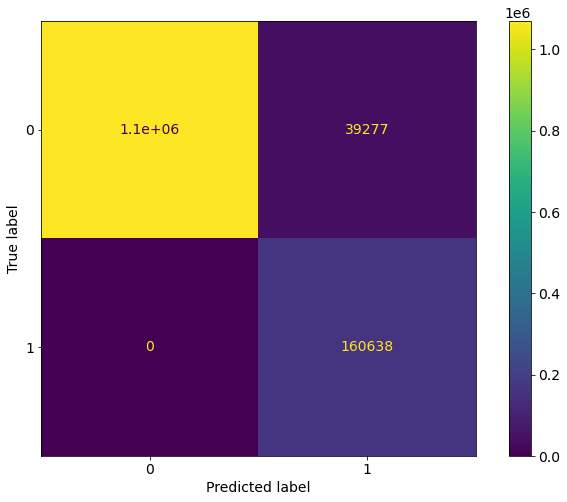

In [62]:
ConfusionMatrixDisplay.from_estimator(xgb_train50_binary, X_test50, y_test50_binary)
plt.show()

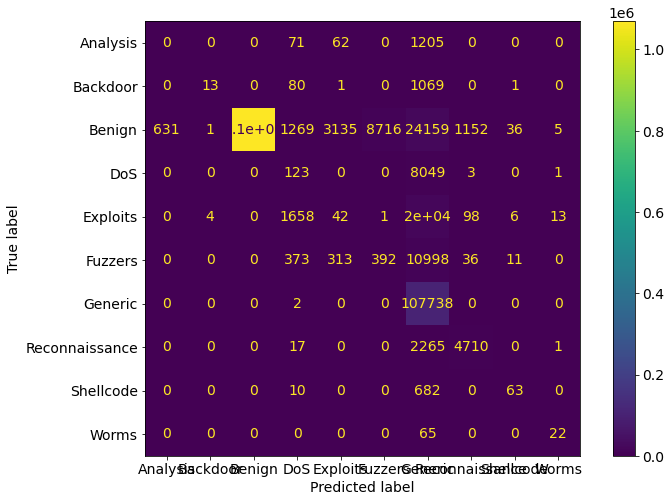

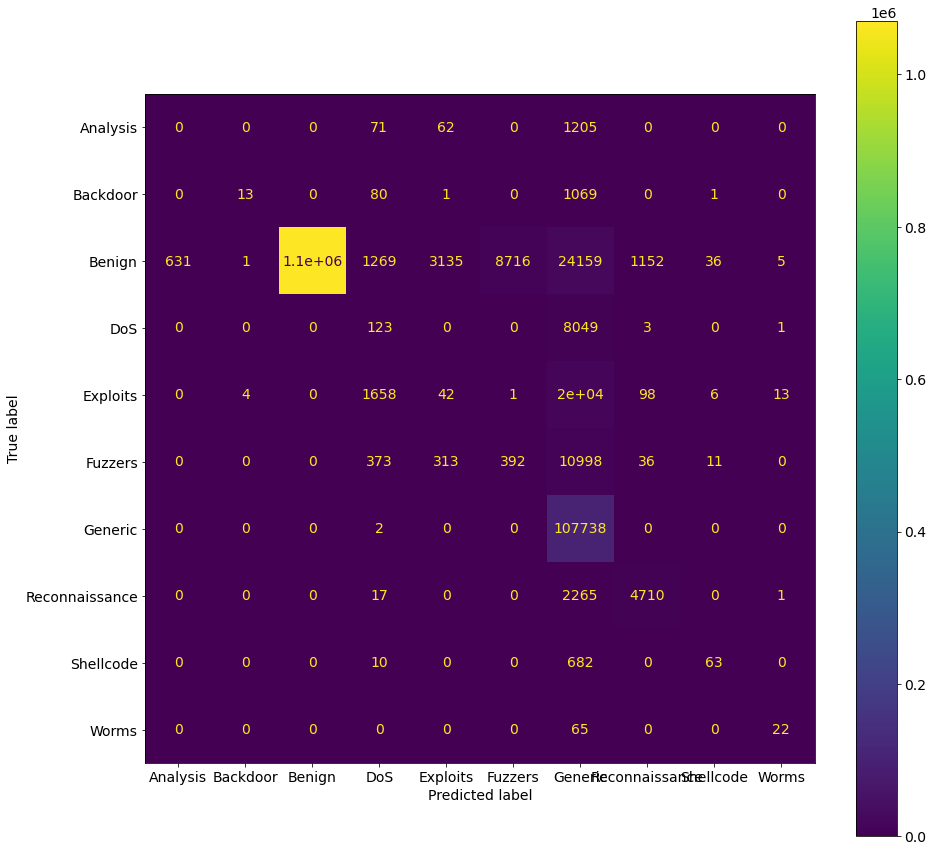

In [63]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_xgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_xgb_multiclass_train.plot(ax=ax)